1. 3개의 데이터를 병합하시요.
====이후문제는 병합한 데이터프레임을 이용 ===========
2. 인덱스를 datetime 으로 만드시요

3. 년도 및 월별, 분기별, 평균 사망자를 보여주시요

4.  2016년 사고대비 사망율을 구하시요

5. 2014년도 월별 사망, 부상 데이터를 바차트로 보여주시요

6. 2015년 대비  사망이 가장 많이 증가한 2016년도 월을 구하시요

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pandas_datareader import data
plt.style.use('ggplot')

In [93]:
df1 = pd.read_csv('2014년 졸음운전 교통사고.csv', encoding='euc-kr', index_col='구분')
df2 = pd.read_csv('2015년 졸음운전 교통사고.csv', encoding='euc-kr', index_col='구분')
df3 = pd.read_csv('2016년 졸음운전 교통사고.csv', encoding='euc-kr', index_col='구분')

#### 데이터 병합

In [34]:
df = pd.concat([df1, df2, df3])
df

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474
2014년6월,233,13,457
2014년7월,229,14,431
2014년8월,222,9,447
2014년9월,225,15,430


#### 인덱스 datetime으로

In [35]:
df.index

Index(['2014년1월', '2014년2월', '2014년3월', '2014년4월', '2014년5월', '2014년6월',
       '2014년7월', '2014년8월', '2014년9월', '2014년10월', '2014년11월', '2014년12월',
       '2015년1월', '2015년2월', '2015년3월', '2015년4월', '2015년5월', '2015년6월',
       '2015년7월', '2015년8월', '2015년9월', '2015년10월', '2015년11월', '2015년12월',
       '2016년1월', '2016년2월', '2016년3월', '2016년4월', '2016년5월', '2016년6월',
       '2016년7월', '2016년8월', '2016년9월', '2016년10월', '2016년11월', '2016년12월'],
      dtype='object', name='구분')

In [36]:
df.index = pd.to_datetime(df.index, format='%Y년%m월')

In [48]:
df.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name='구분', freq=None)

#### 년도 및 월별 평균 사망자

In [78]:
df['사망(명)'].groupby([df.index.year, df.index.month]).mean()

구분    구분
2014  1      7
      2      3
      3     12
      4      4
      5     17
      6     13
      7     14
      8      9
      9     15
      10    14
      11    10
      12    12
2015  1      8
      2      8
      3      4
      4     10
      5      9
      6      8
      7      7
      8     19
      9     10
      10    14
      11     3
      12     8
2016  1      5
      2      6
      3      7
      4      7
      5     13
      6     12
      7      9
      8      7
      9     13
      10    10
      11     5
      12     4
Name: 사망(명), dtype: int64

#### 분기별 평균 사망자

In [43]:
df.resample(rule='Q').mean()['사망(명)']

구분
2014-03-31     7.333333
2014-06-30    11.333333
2014-09-30    12.666667
2014-12-31    12.000000
2015-03-31     6.666667
2015-06-30     9.000000
2015-09-30    12.000000
2015-12-31     8.333333
2016-03-31     6.000000
2016-06-30    10.666667
2016-09-30     9.666667
2016-12-31     6.333333
Freq: Q-DEC, Name: 사망(명), dtype: float64

#### 2016년 사고대비 사망률

In [80]:
df.loc['2016', '사망(명)']/df.loc['2016', '사고(건)']*100

구분
2016-01    2.604167
2016-02    3.448276
2016-03    3.225806
2016-04    3.240741
2016-05    5.439331
2016-06    6.000000
2016-07    3.964758
2016-08    3.043478
2016-09    6.951872
2016-10    5.464481
2016-11    2.500000
2016-12    2.380952
Freq: M, dtype: float64

#### 2014년도 월별 사망, 부상 데이터 바차트로

<AxesSubplot:ylabel='구분'>

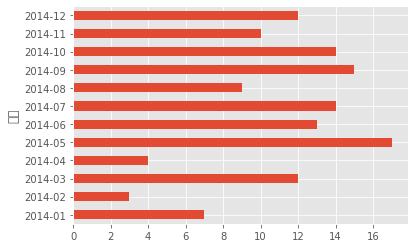

In [92]:
df.loc['2014']['사망(명)'].plot(kind='barh')

<AxesSubplot:ylabel='구분'>

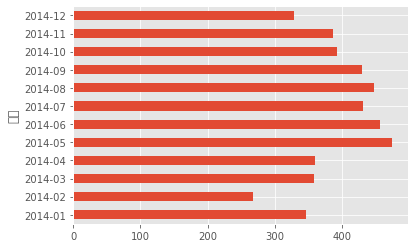

In [73]:
df.loc['2014']['부상(명)'].plot(kind='barh')

#### 2015년 대비 사망이 가장 많이 증가한 2016년도 월

In [86]:
result = df.loc['2016', '사망(명)'].values - df.loc['2015', '사망(명)'].values
result

array([ -3,  -2,   3,  -3,   4,   4,   2, -12,   3,  -4,   2,  -4],
      dtype=int64)

In [90]:
sr = pd.Series(result, index=range(1, 13))
sr.nlargest(1, keep='all').index #series of dataframe

Int64Index([5, 6], dtype='int64')